# Correlação nos nossos dados

## Objetivo: Demonstrar formas de analisar correlação e distribuição simultaneamente (pairplot e jointplot).

In [1]:
import os
import pandas as pd

repo_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
file_patch = os.path.join(repo_dir, "materiais", "survey_results_public.csv")
df = pd.read_csv(file_patch, index_col="ResponseId")
df

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,I am a developer by profession,"Employed, full-time",Fully remote,Freelance/contract work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Written Tutorial...,Udemy,8,5,...,30-60 minutes a day,Less than 15 minutes a day,Just right,DevOps function;Microservices;Developer portal...,Yes,Yes,Yes,Too long,Easy,NaN
73265,I am a developer by profession,"Employed, full-time",Full in-person,Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,Coursera;Udemy;Udacity,6,5,...,15-30 minutes a day,60-120 minutes a day,Very long,None of these,No,Yes,Yes,Too long,Easy,NaN
73266,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby;School or academic work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Other online resources ...,Technical documentation;Programming Games;Stac...,Udemy;Codecademy;Pluralsight;edX,42,33,...,30-60 minutes a day,60-120 minutes a day,Just right,None of these,No,No,No,Appropriate in length,Easy,NaN


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_context('notebook')

### Correlação e Distribuição

Existe outra função "especial" do `seaborn`, capaz de plotar correlações e distribuições dos nossos dados numéricos de uma única vez.

Vamos criar algumas outras colunas numéricas e usar estes dados para plotar:

In [3]:
import numpy as np

df['isBrazil'] = (df['Country'] == 'Brazil').astype(int)
df['LogComp'] = np.log(df['ConvertedCompYearly'])

df_filtered = df.loc[df['ConvertedCompYearly'] <= 300_000][['WorkExp', 'ConvertedCompYearly', 'isBrazil', 'LogComp']]
df_filtered

,WorkExp,ConvertedCompYearly,isBrazil,LogComp
ResponseId,,,,
3,NaN,40205.0,0,10.601747
4,NaN,215232.0,0,12.279472
9,6.0,49056.0,0,10.800718
11,NaN,60307.0,0,11.007203
12,14.0,194400.0,0,12.177673
...,...,...,...,...
73117,16.0,115000.0,0,11.652687
73119,NaN,57720.0,0,10.963359
73120,9.0,70000.0,0,11.156251


Agora, vamos plotar todas as relações com `sns.pairplot`:

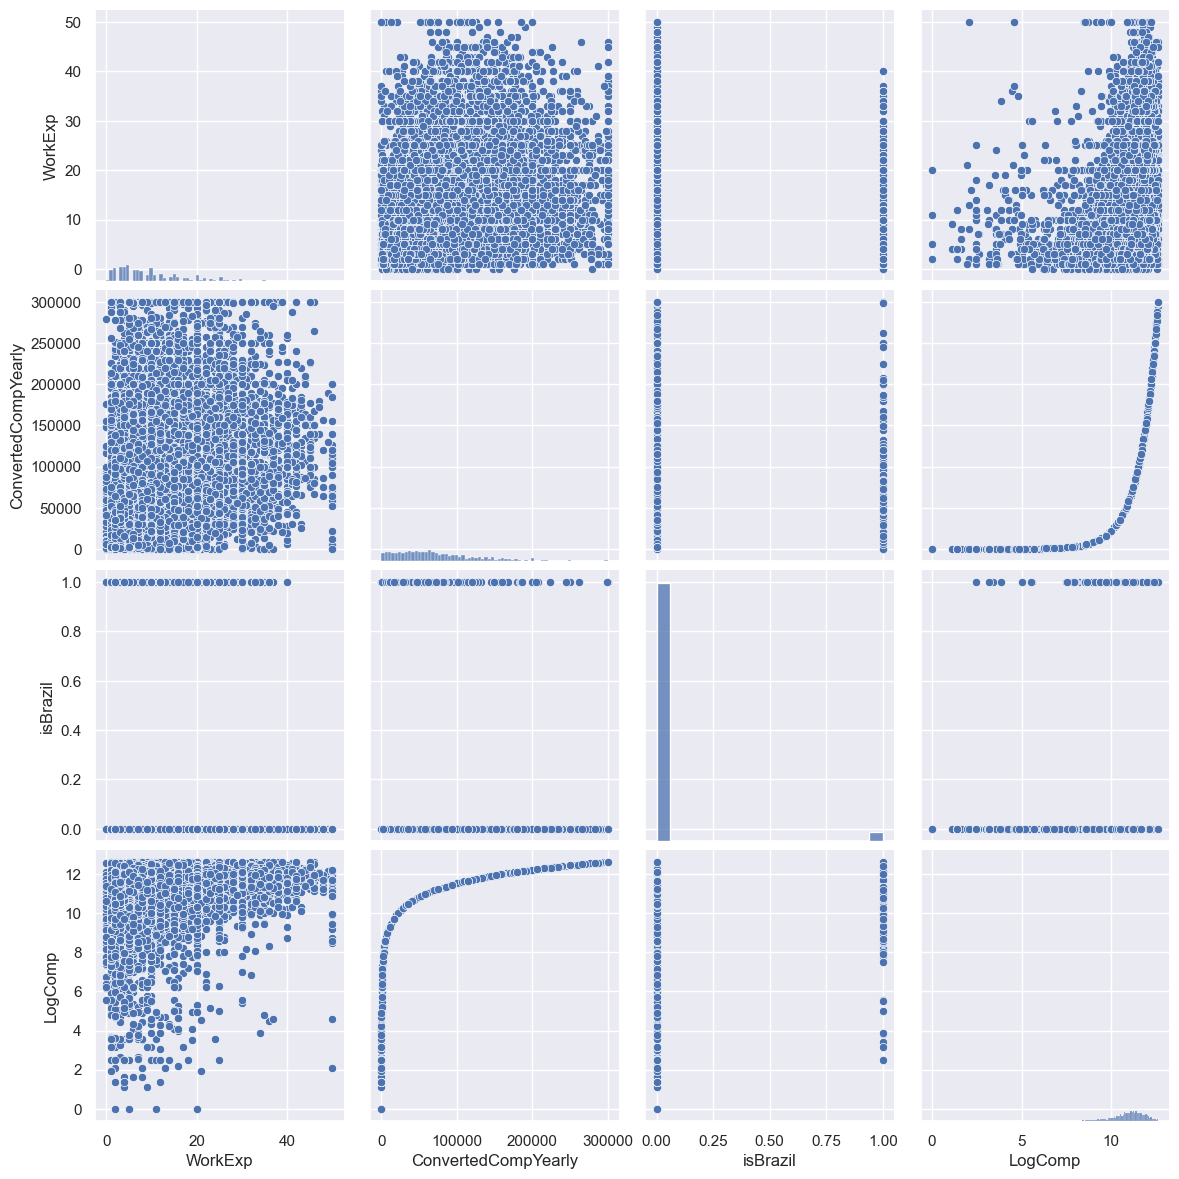

In [4]:
sns.pairplot(data=df_filtered, height=3)
plt.show()

Como podemos ver, o `sns.pairplot` gera uma "matriz" de gráficos para cada uma das colunas (numéricas). Nesta matriz:
- Cada linha/coluna representa o gráfico de espalhamento de duas variáveis (podemos observar correlação)
- Cada diagonal representa o gráfico de histograma de uma variável (podemos observar distribuição)

**Aviso**: cuidado com dados com muitas colunas numéricas! Além de ser demorado para plotar, pode ser impossível de enxergar os dados porque os gráficos ficam muito pequenos. Idealmente, não mais do que 5 colunas!

### Customizando o `pairplot`

Podemos customizar o pairplot de diferentes formas. Por exemplo, podemos:
- Escolher uma coluna para ser a variável que divide os dados em duas cores (`hue`)
- mudar o tipo de gráfico da diagonal (`diag_kind`)
- passar quaisquer argumentos aos gráficos não diagonais (`plot_kws`)

Vamos tentar melhorar o gráfico:

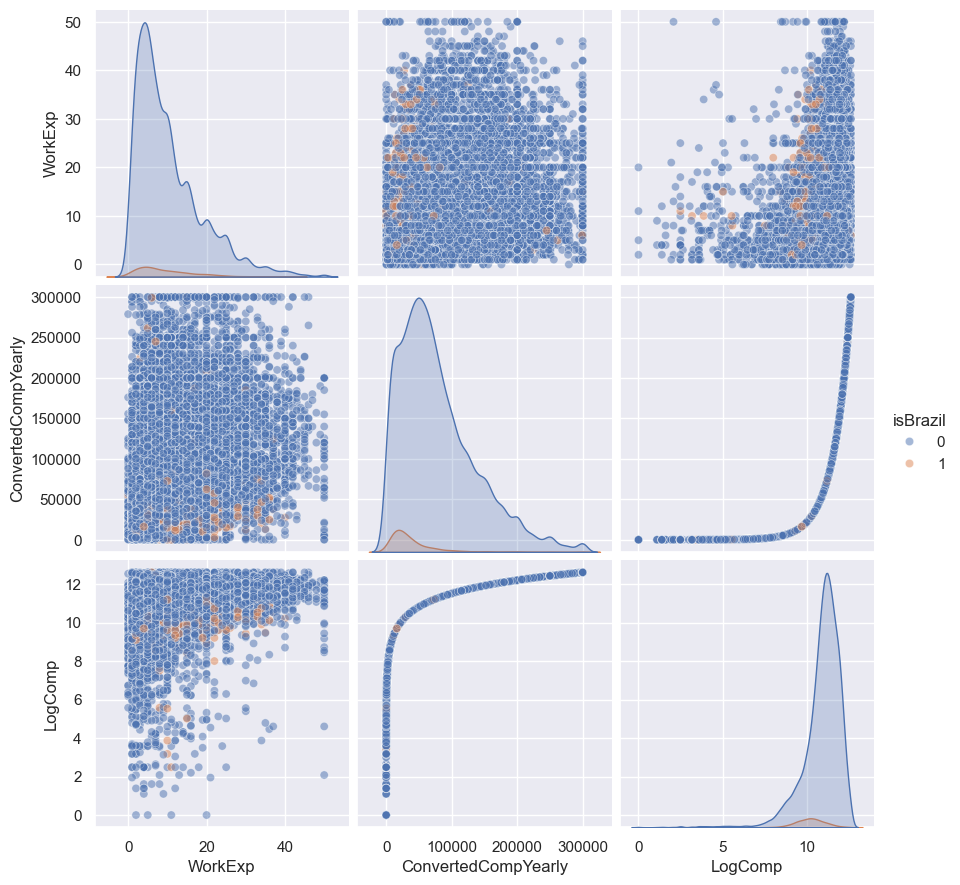

In [5]:
sns.pairplot(data=df_filtered, height=3, hue='isBrazil', plot_kws={'alpha': 0.5}, diag_kind='kde')
plt.show()

Usando histogramas 2D no lugar do espalhamento (`kind="hist"`) e mudando a paleta de cores:

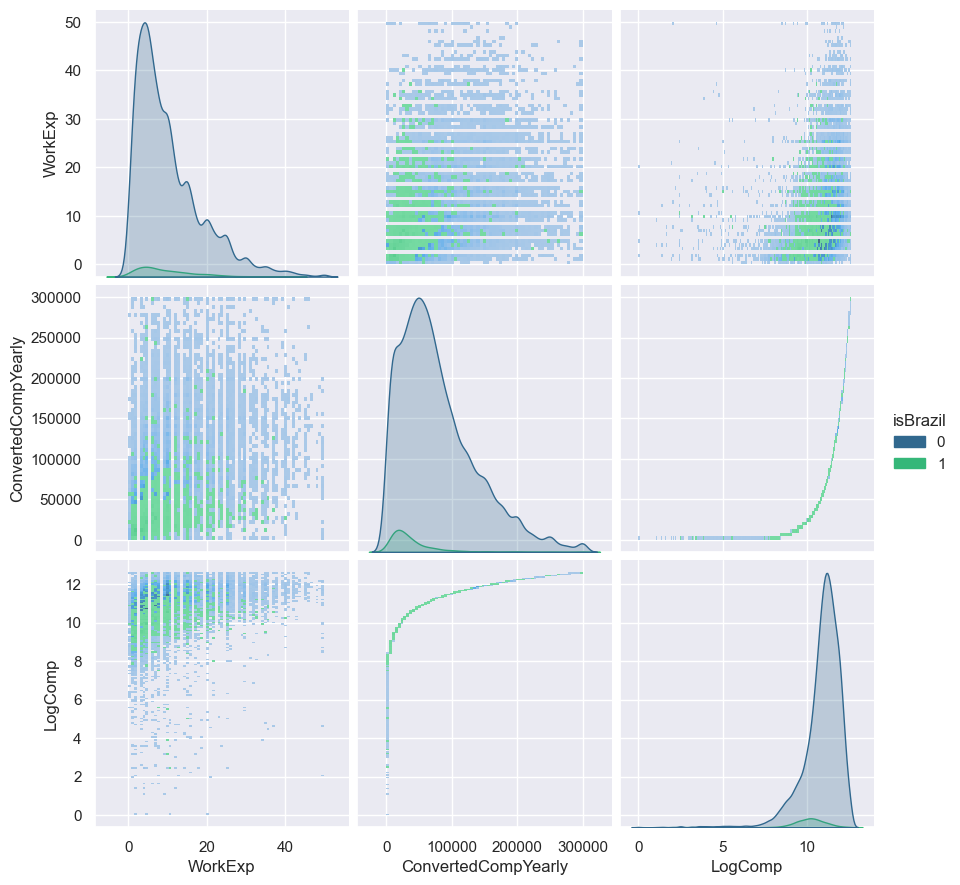

In [6]:
sns.pairplot(
    data=df_filtered,
    height=3,
    hue='isBrazil',
    palette='viridis',
    kind='hist',
    diag_kind='kde',
)
plt.show()

Usando uma paleta própria e tirando a normalização comum dos histogramas da diagonal:

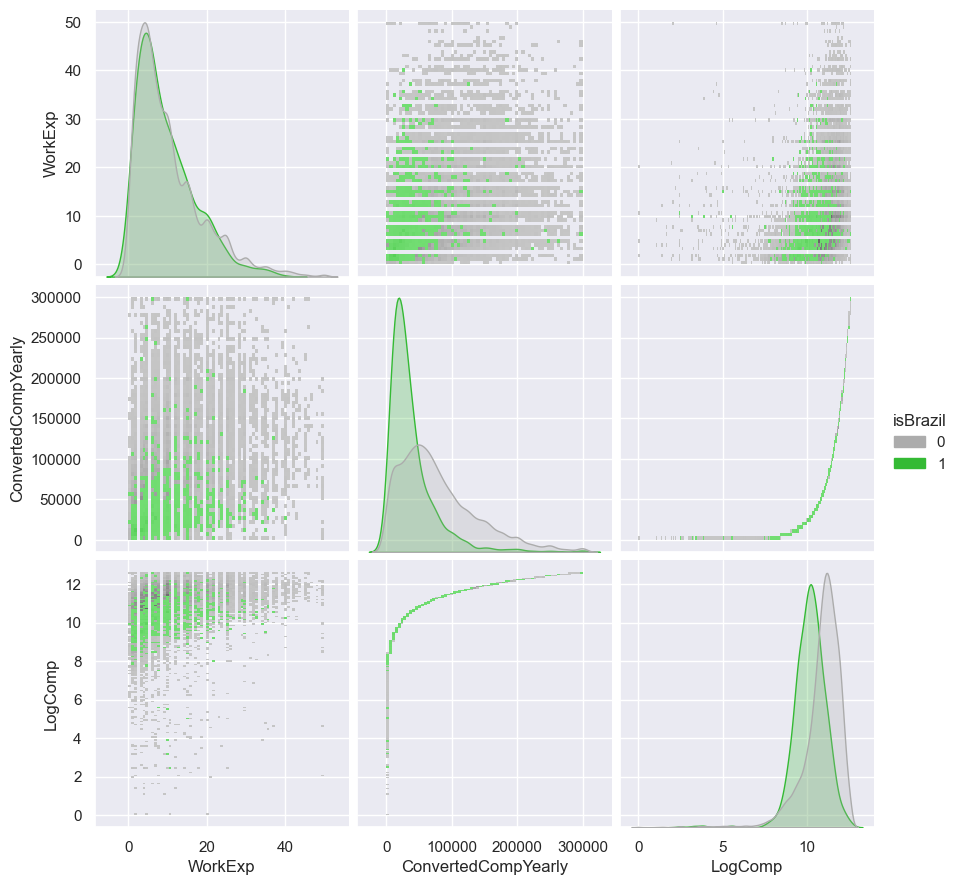

In [7]:
sns.pairplot(
    data=df_filtered,
    height=3,
    hue='isBrazil',
    palette=['#acacac', '#34ba34'],
    hue_order=[0, 1],
    kind='hist',
    diag_kind='kde',
    diag_kws={'common_norm': False},
)
plt.show()

### Informações de duas variáveis com `jointplot`

Outra função com resultado semelhante é `sns.jointplot`.

Essa função olha para a distribuição + correlação de 2 variáveis, ao invés de olhar para todas as variáveis do conjunto de dados de uma só vez.

Por exemplo:

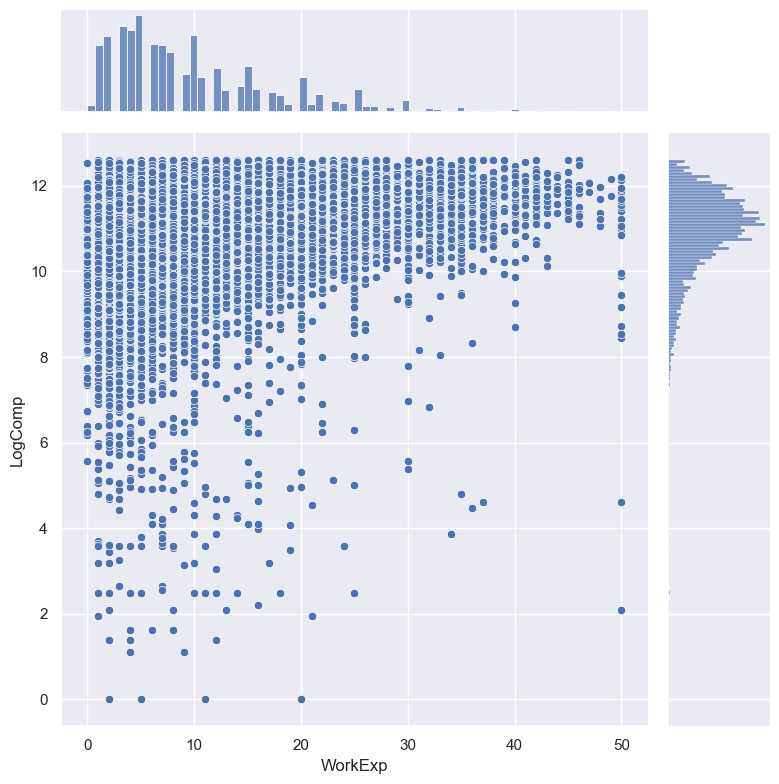

In [8]:
sns.jointplot(data=df_filtered, x='WorkExp', y='LogComp', height=8)
plt.show()

Podemos perceber que este gráfico nada mais é do que o mesmo gráfico do canto inferior esquerdo, com as distribuições de cada variável nas margens.

Da mesma forma como o gráfico anterior, podemos customizar este gráfico também:

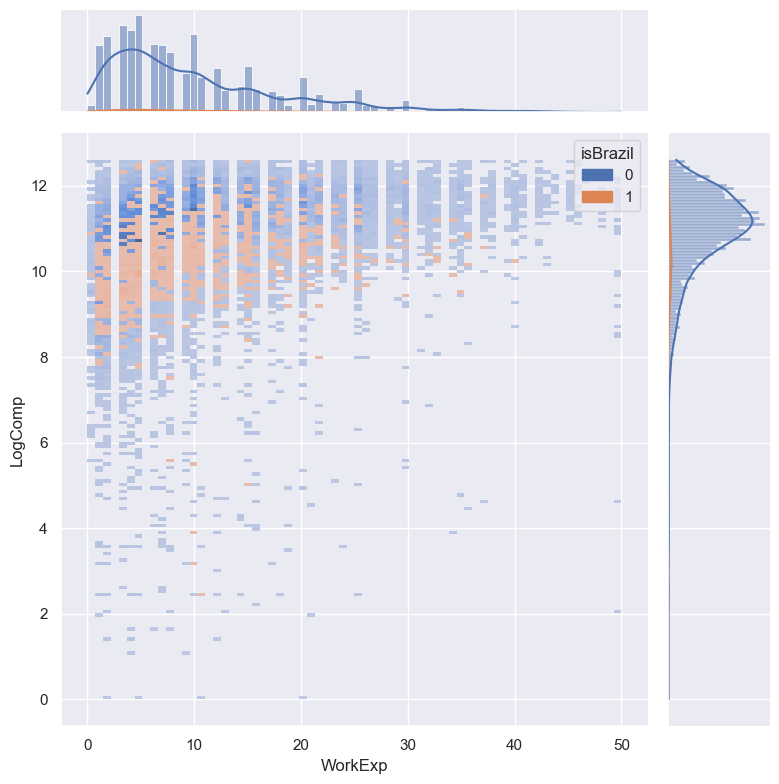

In [9]:
sns.jointplot(
    data=df_filtered,
    x='WorkExp',
    y='LogComp',
    hue='isBrazil',
    height=8,
    kind='hist',
    marginal_kws={'kde': True},
)
plt.show()

Podemos até plotar os próprios dados como um "KDE", com curvas que demonstram a concentração dos dados:

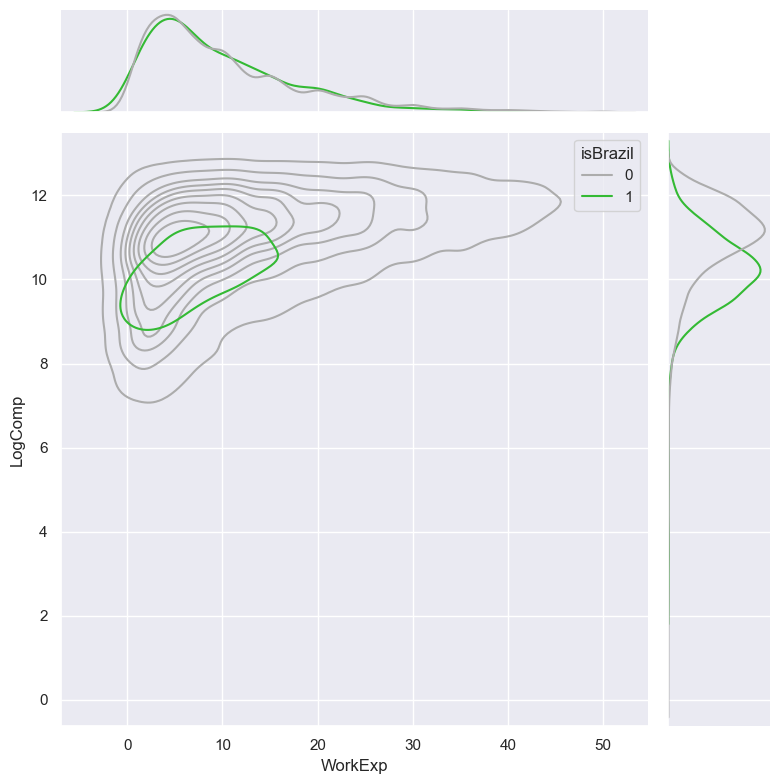

In [10]:
sns.jointplot(
    data=df_filtered,
    x='WorkExp',
    y='LogComp',
    hue='isBrazil',
    height=8,
    palette=['#acacac', '#34ba34'],
    hue_order=[0, 1],
    kind='kde',
    marginal_kws={'common_norm': False},
)
plt.show()

Posso até mesmo pegar o objeto `FacetGrid` e pedir para plotar novos dados nele.

No exemplo abaixo, plotamos o mesmo gráfico acima, e em seguida adicionamos:
- um `scatterplot` ao gráfico central
- um `histplot` ao gráfico nas margens

Veja que os gráficos herdam o comportamento (cores, formatação) do gráfico inicial!

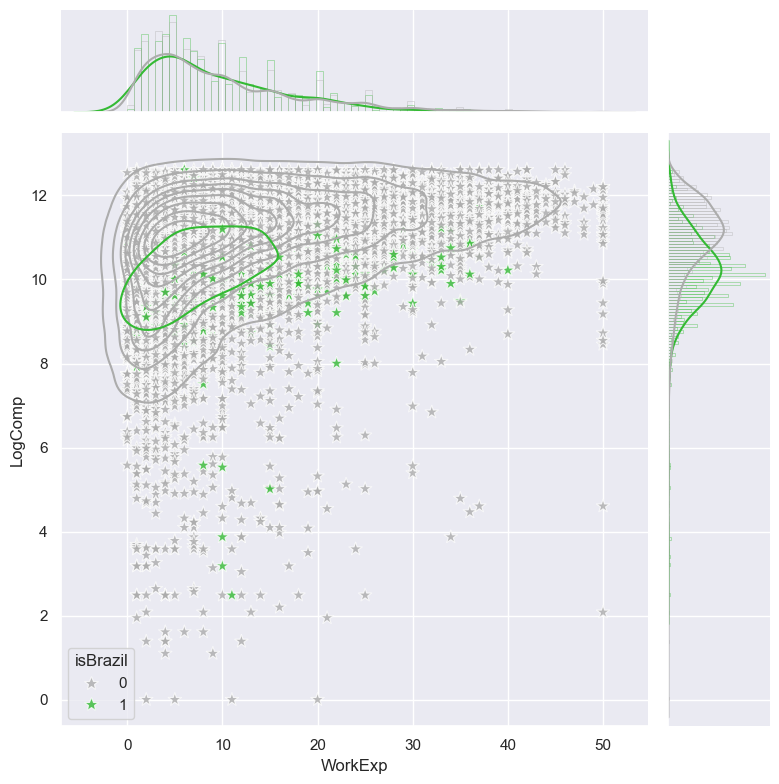

In [11]:
g = sns.jointplot(
    data=df_filtered,
    x='WorkExp',
    y='LogComp',
    hue='isBrazil',
    height=8,
    palette=['#acacac', '#34ba34'],
    hue_order=[0, 1],
    kind='kde',
    marginal_kws={'common_norm': False},
)
g.plot_joint(sns.scatterplot, alpha=0.8, marker='*', s=100)
g.plot_marginals(sns.histplot, fill=False, stat='density', common_norm=False, alpha=0.5)
plt.show()